# Neural Network for MNIST Classification

The MNIST dataset of handwritten digits is the `hello world` for anyone starting with Deep Learning.  

Some facts about the MNIST dataset:
* Contains 70,000 examples of handwritten digits
* 60,000 are training examples and 10,000 are testing examples
* Each image is of size 28 * 28
* Images in the dataset are grayscale 

For detailed info visit http://yann.lecun.com/exdb/mnist/

## Import required libraries

[**Tensorflow**](https://www.tensorflow.org) for creating neural networks. Notice that tensorflow comes with the MNIST data set included. The dataset included is nicely split into testing and training sets already as we will see.

[**Matplotlib**](https://matplotlib.org/) for creating graphs.

In [12]:
import tensorflow as tf
# import the mnist dataset that comes with tensorflow
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
# allows graph to be drawn inline and shown in output.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

##### Load Dataset

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


###### Now we will inspect the shapes of our training and testing sets

In [3]:
print("Shape of the training images: {}".format(mnist.train.images.shape))
print("Shape of the training labels: {}".format(mnist.train.labels.shape))

print("=============")

print("Shape of the testing images: {}".format(mnist.test.images.shape))
print("Shape of the testing labels: {}".format(mnist.test.labels.shape))

Shape of the training images: (55000, 784)
Shape of the training labels: (55000, 10)
Shape of the testing images: (10000, 784)
Shape of the testing labels: (10000, 10)


We have 55000 training examples. We will use this set for training our neural network

Interesting thing to note is that each example has dimension 784. As mentioned earlier the images in MNIST dataset are 28 X 28. We can visualize that image as 2d matrix of dimension 28 X 28 (put these numbers into your calculator). This matrix can be rearranged as 784 X 1.

Lets inspect one of our examples.

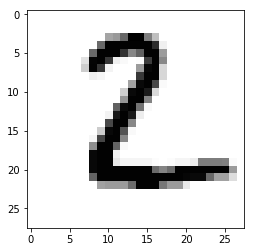

In [4]:
image = mnist.test.images[1]
plt.imshow(image.reshape((28,28)))

Create two placeholders one for input and one for output. Notice that the first dimension is `None`. This means that we are asking tensorflow to decide that dimension automatically.

In [5]:
# create placeholders for input data, note that the first dimension is None.
x = tf.placeholder(tf.float32, [None, 784], name="Inputs")
# create placeholder for outputs. We have 10 possible outputs
y_ = tf.placeholder(tf.float32, [None, 10], name="Outputs")

#### Building the Neural Network Architecture

We have the following architecture.

2 hidden layers.

1st hidden layer: Input 784 -> ReLu -> Output 400  
2nd hidden layer: Input 400 -> ReLu -> Output 100

Output Layer: Input 100 -> softmax -> Output 10

The softmax outputs the probability distribution.

In [6]:
# Layer 1
# create a weight matrix
W1 = tf.Variable(tf.truncated_normal(shape=[784, 400], stddev=0.1), name="Weights_Layer1")
# bias matrix
b1 = tf.Variable(tf.constant(0.1, shape=[400]), name="bias_Layer1")
# activation function
a1 = tf.nn.relu(tf.matmul(x, W1) + b1, name="RELU_1")

# Layer 2
W2 = tf.Variable(tf.truncated_normal(shape=[400, 100], stddev=0.1), name="Weights_Layer2")
b2 = tf.Variable(tf.constant(0.1, shape=[100]), name="bias_Layer2")
a2 = tf.nn.relu(tf.matmul(a1, W2) + b2, name="RELU_2")

# Output Layer
W3 = tf.Variable(tf.truncated_normal(shape=[100, 10], stddev=0.1), name="Weights_Output")
b3 = tf.Variable(tf.constant(0.1, shape=[10]), name="bias_Output")
# softmax to generate probability distribution
y = tf.nn.softmax(tf.matmul(a2, W3) + b3, name="softmax_Output")

#### The loss function
The loss function is used by the optimizer. The optimizer tries to minimize the loss.

We are using the cross entropy loss. Tensorflow provides builtin in cross entropy loss function we can also use that. 

In [7]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

#### Optimizer

Optimizer is the main workhorse here. The optimizer will adjust the weights and learn the generalized function.

There are various optimizers available. We will be using [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#### Start Training

In [9]:
# initalize variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Train for 1000 epochs taking 100 examples at a time

In [10]:
for i in range(1000):
    # train in minibaches of 100
    batch_x, batch_y = mnist.train.next_batch(100)
    # this line trains the network
    sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})

#### Check accuracy

We will check predicted value against the gound truth

In [11]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
ac, loss = sess.run([accuracy, cross_entropy], feed_dict={x: mnist.test.images, y_: mnist.test.labels})

print("Accuracy: {:0.2f}%".format(ac * 100))
print("Loss: {:0.4f}".format(loss))

Accuracy: 97.17%
Loss: 0.0914


### Concluding Remarks
***

We trained a Simple Neural Network for MNIST classification and achieved fairly high accuracy. However, there are few things that we left.

In MNIST, there are 60000 training examples, but when we printed the shape of training set there were 55000 examples only. Where did those 5000 go?

We will explore this later.